## Importing Modules

In [1]:
import matplotlib as mpl
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

## Colormaps

In [2]:
# help(mpl.cm) to see the types of colormaps available 

<IPython.core.display.Javascript object>


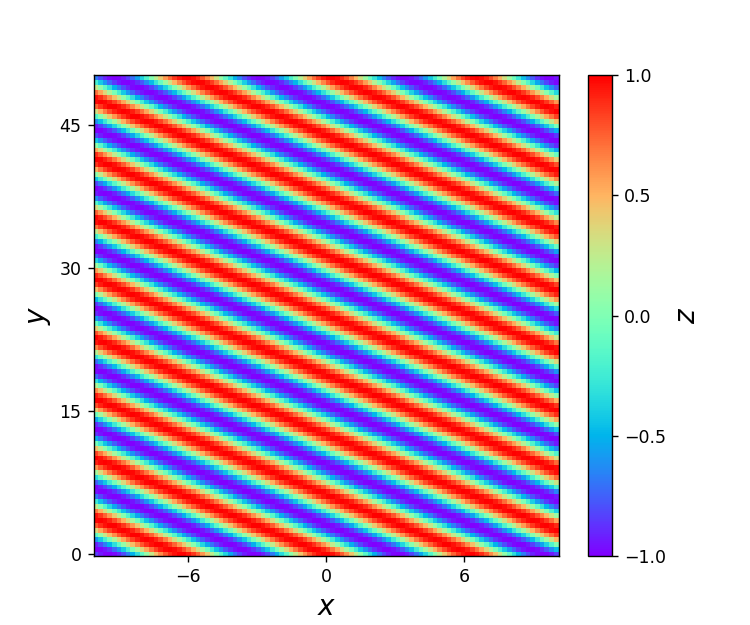

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(0, 50, 100)
X, Y = np.meshgrid(x, y)
Z = np.cos(X + Y)

fig, ax = plt.subplots(figsize=(6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max()) #max and min of the color bar
p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.rainbow, shading="auto")

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"$y$", fontsize=16)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p)
cb.set_label(r"$z$", fontsize=16)
cb.set_ticks([-1, -0.5, 0, 0.5, 1])

 ## 3D Plots

<IPython.core.display.Javascript object>


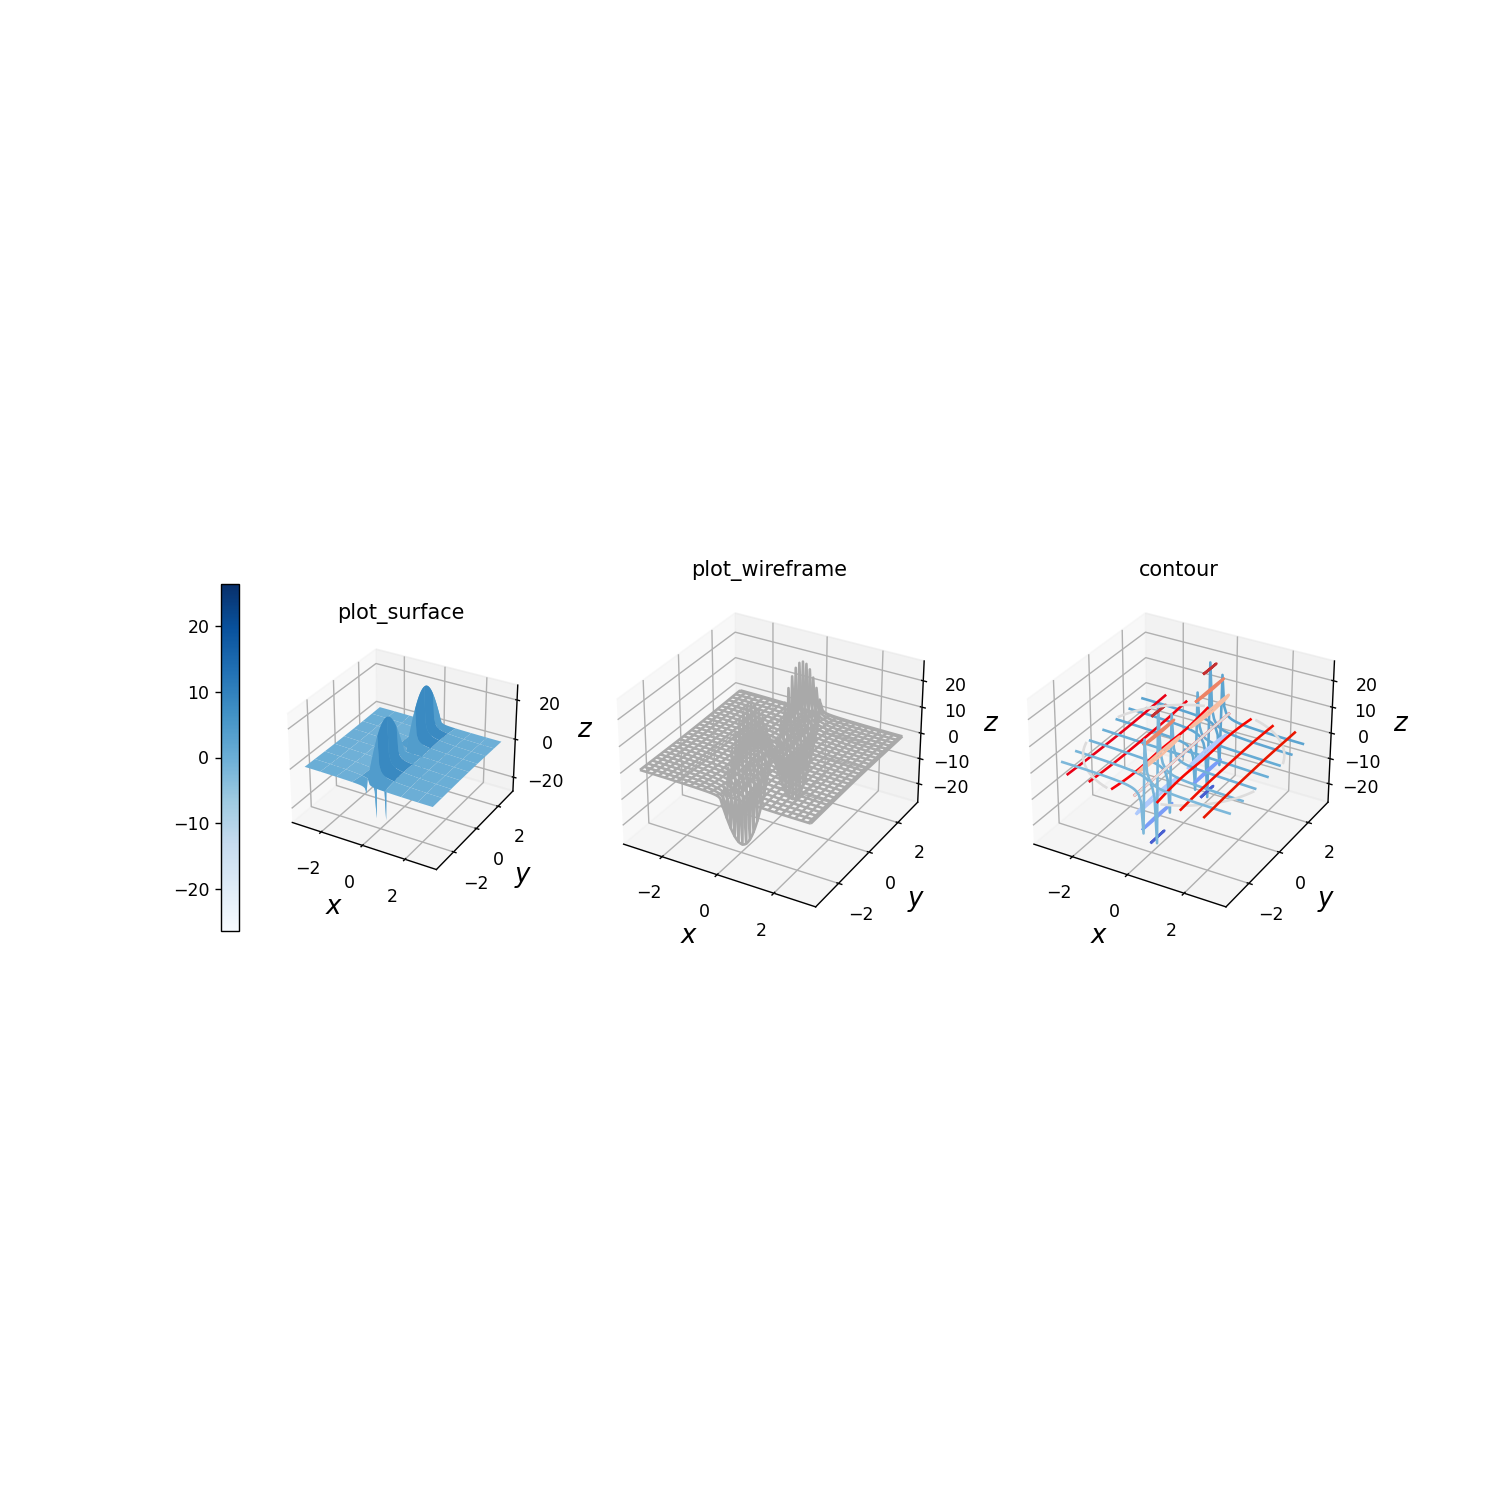

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12),
                         subplot_kw={'projection':'3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=15)
    ax.set_ylabel("$y$", fontsize=15)
    ax.set_zlabel("$z$", fontsize=15)
    
x = y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / X

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=10, cstride=10, linewidth=0, 
                        norm=norm, cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.3, location='left')
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=3, cstride=3, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', norm=norm, cmap=mpl.cm.coolwarm)
cset = axes[2].contour(X, Y, Z, zdir='y', norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='x', norm=norm, cmap=mpl.cm.brg)

title_and_labels(axes[2], "contour")